Application of LP to breast cancer detection

Data preparation 

In [1]:
# We will use the following libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load the data from UCI Machine Learning repository
names = ['id_number',
     'Thickness', 
     'Cell Size',
     'Cell Shape',
     'Marginal Adhesion',
     'Epithelial Size',
     'Bare Nuclei',
     'Bland Chromatin',
     'Normal Nucleoli',
     'Mitoses',
     'Diagnosis']
from google.colab import files
uploaded = files.upload()
data_breast = pd.read_csv('data-breast-cancer-wisconsin.data', 
                 names = names)
# Show the first 25 rows
data_breast.head(25)

Saving data-breast-cancer-wisconsin.data to data-breast-cancer-wisconsin.data


,id_number,Thickness,Cell Size,Cell Shape,Marginal Adhesion,Epithelial Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
# Reanaming missing values
df=data_breast.replace('?', np.nan)
df.head(2)

,id_number,Thickness,Cell Size,Cell Shape,Marginal Adhesion,Epithelial Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [4]:
# Counting the missing values
df.isna().sum()

id_number             0
Thickness             0
Cell Size             0
Cell Shape            0
Marginal Adhesion     0
Epithelial Size       0
Bare Nuclei          16
Bland Chromatin       0
Normal Nucleoli       0
Mitoses               0
Diagnosis             0
dtype: int64

In [5]:
# Another way to do it
df["Bare Nuclei"].apply(np.isreal).value_counts()

False    683
True      16
Name: Bare Nuclei, dtype: int64

In [6]:
# Removing the 16 rows with missing data (all of them belonging to Bare Nuclei column)
df=df.dropna()
df.head(5)

,id_number,Thickness,Cell Size,Cell Shape,Marginal Adhesion,Epithelial Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
# Warning : we can see that we still have str values in Bare Nuclei. We will deal with this after
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_number          683 non-null    int64 
 1   Thickness          683 non-null    int64 
 2   Cell Size          683 non-null    int64 
 3   Cell Shape         683 non-null    int64 
 4   Marginal Adhesion  683 non-null    int64 
 5   Epithelial Size    683 non-null    int64 
 6   Bare Nuclei        683 non-null    object
 7   Bland Chromatin    683 non-null    int64 
 8   Normal Nucleoli    683 non-null    int64 
 9   Mitoses            683 non-null    int64 
 10  Diagnosis          683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [0]:
# Converting the dtype of Bare Nuclei column into numeric value
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id_number          683 non-null    int64
 1   Thickness          683 non-null    int64
 2   Cell Size          683 non-null    int64
 3   Cell Shape         683 non-null    int64
 4   Marginal Adhesion  683 non-null    int64
 5   Epithelial Size    683 non-null    int64
 6   Bare Nuclei        683 non-null    int64
 7   Bland Chromatin    683 non-null    int64
 8   Normal Nucleoli    683 non-null    int64
 9   Mitoses            683 non-null    int64
 10  Diagnosis          683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [0]:
# Re-scoring the Diagnosis values 2 to 0 (Benign), 4 to 1 (Malign)
df['Diagnosis']=(df['Diagnosis']/2)-1

In [11]:
df.head(5)

,id_number,Thickness,Cell Size,Cell Shape,Marginal Adhesion,Epithelial Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis
0,1000025,5,1,1,1,2,1,3,1,1,0.0
1,1002945,5,4,4,5,7,10,3,2,1,0.0
2,1015425,3,1,1,1,2,2,3,1,1,0.0
3,1016277,6,8,8,1,3,4,3,7,1,0.0
4,1017023,4,1,1,3,2,1,3,1,1,0.0


In [12]:
# Number of benign (0) and malign (1) cells
df['Diagnosis'].value_counts()

0.0    444
1.0    239
Name: Diagnosis, dtype: int64

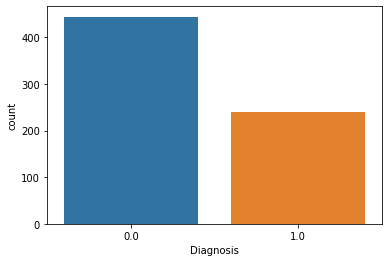

In [13]:
# Visualize the previous count
sns.countplot(df['Diagnosis'], label='count')

In classification problems, we are given two sets of points in the space of n dimensions $\mathbb R^n$.
Our aim is to find a hyperplane in the space $\mathbb R^n$ that separates these two sets as accurately
as possible. We use this hyperplane to classify any new points that arise; if the new point
lies on one side of the hyperplane, we classify it as an element of the first set, while if it lies
on the other side, we place it in the second set.
Linear programming can be used to find the separating hyperplane, which is defined
by a vector $w \in  \mathbb R^n$ and a scalar $\gamma$ . Ideally, we would like each point $t$ in the first set to
satisfy $w't ≥ \gamma$ , while each point $t$ in the second set satisfies $w't ≤ \gamma$ . To guard against a trivial answer (note that the conditions just specified are trivially satisfied by $w = 0$ and
$\gamma = 0$!), we seek to enforce the stronger conditions $w't ≥ \gamma + 1$ for points in the first
set and $w't ≤ \gamma − 1$ for points in the second set. Moreover, because the two sets may be intermingled, it may not be able to enforce a clean separation. We define the $objective function$ in the linear program to be the sum of the average violations of the classification
conditions over each set. We set up the linear program by constructing an $m\times n$ matrix $M$ whose $i$th row contains the $n$ components of the $i$th points in the first set. Similarly, we construct a $k\times n$
matrix $B$ from the points in the second set. The violations of the condition $w't ≥ \gamma + 1$ for points in the first set are measured by a vector $y$, which is defined by the inequalities
$y ≥ −(Mw − \gamma e) + e, y ≥ 0$, where $e = (1, 1,..., 1)\in \mathbb R^m$. Similarly, violations of the
condition $w't ≤ \gamma − 1$ for points in the second set are measured by the vector $z$ defined
by $z ≥ (Bw − \gamma e) + e, z ≥ 0$, where $e ∈ \mathbb R^k$. In general, $e$ will be a vector of ones of appropriate dimension. The average violation on the first set is $e'y/m$ and on the second set is $e'
z/k$, and so we can write the linear program as follows:

$\min \frac{1}{m}e'y + \frac{1}{k}e'z$

subject to

$y ≥ −(Mw − \gamma e) + e,\\
z ≥ (Bw − \gamma e) + e,\\
(y, z) ≥ 0$.

In [0]:
# Getting the matrices B and M containing the benign and malign vectors, respectively. 
B = df.loc[df['Diagnosis']== 0]
M = df.loc[df['Diagnosis']== 1]

In [0]:
# We drop id_number and Diagnosis columns
B=B.drop(columns = ['id_number', 'Diagnosis'])
M=M.drop(columns = ['id_number', 'Diagnosis'])

In [0]:
# Converting B and M into arrays
B=np.array(B)
M=np.array(M)

In [17]:
B

array([[5, 1, 1, ..., 3, 1, 1],
       [5, 4, 4, ..., 3, 2, 1],
       [3, 1, 1, ..., 3, 1, 1],
       ...,
       [3, 1, 1, ..., 2, 1, 2],
       [3, 1, 1, ..., 1, 1, 1],
       [2, 1, 1, ..., 1, 1, 1]])

In [18]:
M

array([[ 8, 10, 10, ...,  9,  7,  1],
       [ 5,  3,  3, ...,  4,  4,  1],
       [ 8,  7,  5, ...,  5,  5,  4],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]])

In [19]:
B.shape

(444, 9)

In [20]:
M.shape

(239, 9)